In [2]:
import joblib
import pandas as pd
import numpy as np
import re


#Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
df = joblib.load('data/txtclean2')

In [4]:
df.head()

,app_id,dlc,recommendationid,review,voted_up,votes_up,votes_funny,weighted_vote_score,review_created,review_updated,review_year,steamid,num_games_owned,num_reviews,rating,helpful,review_length
0,1256,1,23698284,"I got this back in 2010 and it was around $2, ...",False,51.0,1.0,0.781742,2016-06-22 03:34:47,2016-06-22 03:34:47,2016,76561197963558222,251,15,negative,helpful,175
1,1256,1,13871472,DJ Scully nuff said.,True,23.0,4.0,0.707484,2015-01-06 22:47:16,2015-01-06 22:47:16,2015,76561198044217796,125,8,positive,helpful,20
2,1256,1,2722792,These Killing Floor characters really adds to ...,True,22.0,2.0,0.659986,2011-12-09 03:54:38,2011-12-09 03:54:38,2011,76561198011647032,11679,502,positive,helpful,963
3,1256,1,15154600,Guy in a HaZmat suit... cool\nSome guy with so...,True,7.0,10.0,0.593850,2015-04-01 13:25:40,2015-04-01 13:25:40,2015,76561198023430257,489,302,positive,helpful,176
4,1256,1,640873,This DLC has the best looking character models...,True,9.0,0.0,0.591672,2010-12-15 01:26:52,2010-12-15 01:26:52,2010,76561197973951600,425,21,positive,helpful,62


In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['TJBs', 'YET', 'V10', 'EMPRAH']

In [18]:
stop += ['The', 'it, td', 'This']

In [19]:
def get_top_n_words(corpus, n=None):
    cvec = CountVectorizer(lowercase=False, stop_words = stop, ngram_range=(1, 1)) 
    bag_of_words = cvec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

game 36238
The 25991
DLC 24565
like 18885
get 15227
It 15119
good 14106
one 13745
td 13031
new 12468
This 12360
really 11943
would 9162
great 8758
10 8314
worth 8160
even 8040
play 7606
much 7575
buy 7330


/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


AttributeError: 'Rectangle' object has no property 'ytitle'

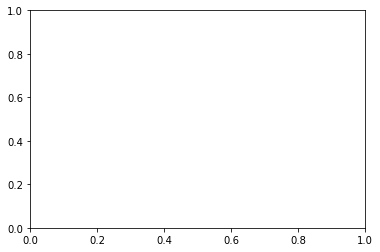

In [9]:
common_words = get_top_n_words(df['review'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review')



game 36238
The 25991
DLC 24565
like 18885
get 15227
It 15119
good 14106
one 13745
td 13031
new 12468
This 12360
really 11943
would 9162
great 8758
10 8314
worth 8160
even 8040
play 7606
much 7575
buy 7330


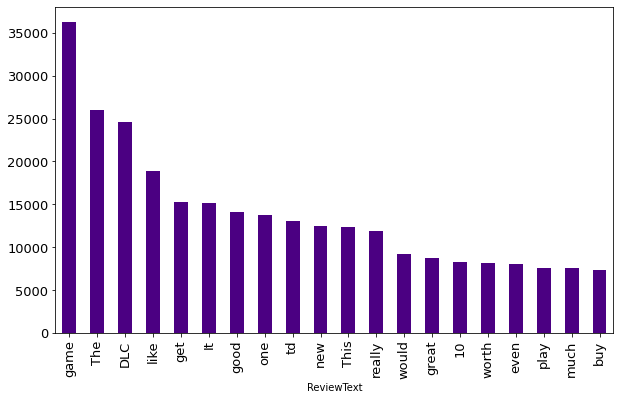

In [17]:
common_words = get_top_n_words(df['review'], 20)
for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

df1 = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False)

df1.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);

#ax.set_title('Top 20 words in review'), fontsize=22
#ax.set_ylabel('Count', fontsize=15);
#plt.show()


/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['td'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


game 36238
DLC 24565
like 18885
get 15227
It 15119
good 14106
one 13745
td 13031
new 12468
really 11943
would 9162
great 8758
10 8314
worth 8160
even 8040
play 7606
much 7575
buy 7330
time 7180
well 7076


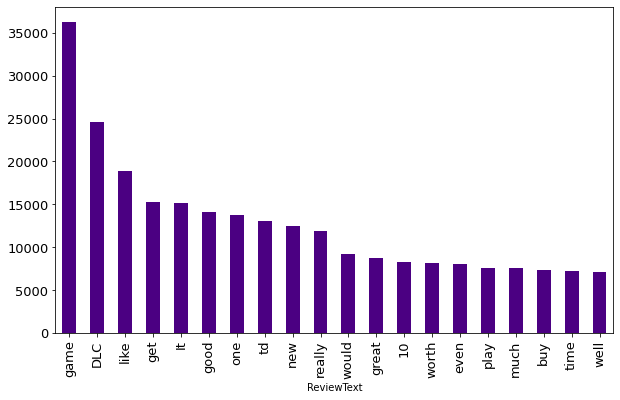

In [20]:
common_words = get_top_n_words(df['review'], 20)
for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

df1 = df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False)

df1.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);

In [30]:
def get_top_n_bigram(corpus, n=None):
    cvec = CountVectorizer(lowercase=False, stop_words = stop, ngram_range=(2, 2)) 
    bag_of_words = cvec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
cvec = CountVectorizer(lowercase=False, max_df = 0.8, ngram_range=(1, 1)) 
#capitalisation etc could be important, can change ngrams later
X = cvec.fit_transform(df.review)

In [42]:
cvec = CountVectorizer(lowercase=False, stop_words = stop, ngram_range=(1, 2)) 
X_all = cvec.fit_transform(df.review)
words = cvec.get_feature_names()
# number of different words
print(len(words))
#max_df didn't actually get rid of any words
columns = cvec.get_feature_names()

1328772


In [43]:
def get_freq_words(sparse_counts, columns):

    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting

    word_counts = np.ravel(X_all.sum(axis=0))
    freq_words = pd.Series(
        word_counts, index=columns).sort_values(ascending=False)

    return freq_words


freq_words = get_freq_words(X_all, columns)
freq_words[:20]

like      18885
get       15227
good      14106
one       13745
td        13031
new       12468
really    11943
would      9162
great      8758
10         8314
worth      8160
even       8040
play       7606
much       7575
buy        7330
td td      7186
time       7180
well       7076
pack       7050
fun        6988
dtype: int64

In [38]:
stop += ['game', 'dlc, td']

In [41]:
stop += ['DLC', 'It']